# CST4050 - Individual Assessment (comp 2)

**Student**:

- Name:Geethu
- Surname:Thottungal Harilal
- Student number:M00907280
- Campus:Hendon

## 1. Loading data and preliminary analysis

### 1.1. Checking the target

In [11]:
# import required libraries 
import pandas as pd
import seaborn as sb
import numpy as np

#Load the csv file and store into variable supervised_df
supervised_df = pd.read_csv('supervised.csv') 

# Store the dependent variable Life_Expectancy to y
y = supervised_df[["Life_Expectancy"]].astype(float)

# Print first five rows of target y
y.head() 

,Life_Expectancy
0,65.0
1,77.8
2,75.6
3,52.4
4,76.3


###### The dependent variable Life_Expectancy is numeric and thus, the supervised problem is a regression task.


Some basic statistics of dependent data can be checked with describe() method

In [12]:
# basic statistics of dependent data 
y.describe()

,Life_Expectancy
count,130.000000
mean,70.741538
std,7.997381
min,51.000000
25%,65.725000
50%,72.150000
75%,76.025000
max,85.000000


As the target is numerical, the distribution of target can be visualised with a histogram.

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Count'>

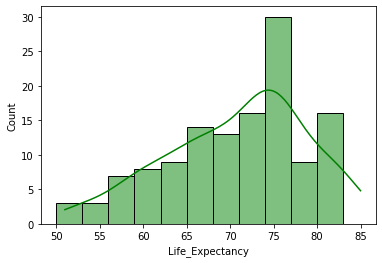

In [13]:
# customised histoplot to visualise the distribution of target
sb.histplot(supervised_df["Life_Expectancy"],kde=True, bins = np.arange(50,85,3), color='green')

By checking the distribution, it can be seen that, the majority of life expectancy lies between 51 and 85 with average life expectancy of 70.74.

### 1.2. Checking the features 


In [14]:
# Store all remaining attributes to X as features 
X = supervised_df.drop(columns=supervised_df.columns[-1])
# Shape of the feature data
X.shape

(130, 18)

Shape of the feature set is 130, 18. i.e. the feature set contains 130 rows and 18 columns.

Some basic statistics and distribution of feature data can be checked with describe() method

In [15]:
X.describe()

,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,130.000000,130.000000,130.000000,130.000000
mean,158.676923,27.723077,3.355807,80.653846,1773.315385,40.533077,36.761538,81.123077,82.846154,0.785385,5997.928670,1.163121e+07,4.680769,4.780769,0.674792,12.746923
std,99.484969,96.426702,32.567606,24.992933,9130.704172,21.196345,123.951904,25.435133,23.289370,1.520206,10101.952401,3.017667e+07,4.380632,4.477144,0.151216,2.760159
min,1.000000,0.000000,0.000000,6.000000,0.000000,2.500000,0.000000,6.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,5.400000
25%,79.000000,0.000000,0.000000,77.250000,0.000000,23.325000,1.000000,78.250000,78.000000,0.100000,702.333884,2.423205e+05,1.525000,1.550000,0.550500,10.800000
50%,145.500000,3.000000,0.000000,91.000000,16.500000,41.300000,3.000000,91.500000,92.500000,0.100000,2231.867706,1.894576e+06,3.400000,3.450000,0.701500,12.750000
75%,215.000000,20.500000,0.000000,96.000000,210.500000,61.200000,25.500000,97.000000,97.000000,0.500000,6311.780768,1.095208e+07,6.500000,6.575000,0.784000,14.675000
max,484.000000,910.000000,364.975229,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,56554.387600,2.581621e+08,26.700000,27.300000,0.937000,20.400000


It can be observed that the variables are not standardised.
Standardised variables are important to have an interpretable regression model.  

## 2. Training and testing a machine learning pipeline


The current work proposes to use the pipeline with muliple linear regression and StandardScaler to predict the target "Life Expectancy" using the available featues.
A sequence of steps are generally always necessary to construct and optimise a regression model. By combining these processes, a single predictor can be created using Pipeline which is a function of scikit-learn which will provide a better performance compared to other model.

Defined a pipeline as follow:

    * Standardisation of features
    * OLS regression on the transformed feature space

The module Pipeline of sklearn.pipeline allows us to do so.

The available feature dataset contains both numerical and categorical values. The coulmns 'Country' and 'Status' are the categorical variables and remaining variables are numerical. So before splitting into training testing set, the categorical variable 'Country' is removed from feature set and the other categorical variable 'Status' is handled by converting into dummy variables using the built-in function get_dummies() provided by pandas.

In [16]:
X = X.drop(columns=X.columns[0]) # removing the first column Country
X["Status"]= pd.get_dummies(X["Status"], drop_first= True) # convert Status variable into dummy variables

In [17]:
# dataset is splitted into train-test set by using the scikit-learn module 'train_test_split'
from sklearn.model_selection import train_test_split # importing train_test_split library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10, shuffle=True) # splitting the dataset 

As for the linear regression, we are using the LinearRegression module from sklearn.linear_model

In [18]:
from sklearn.preprocessing import StandardScaler # Library to standardise data
from sklearn.linear_model import LinearRegression # Library to use Linear Regression
from sklearn.pipeline import Pipeline # Library to create a pipeline

# Building a pipeline
pipe = Pipeline([('scaler', StandardScaler()), # scaling features
                 ('lm', LinearRegression())]) # linear regression

# Implementing our pipe
pipe.fit(X_train, y_train)
    
# Use the trained model to create predictions on train and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

###### Accuracy 

To check the model peformance in train and test data, the block below create two new daframes, associated with train and test data respectively. Both datasets contain actual values against fitten ones.

In [19]:
 # accuracy on train and test
print("Accuracy on train:", pipe.score(X_train, y_train))
print("Accuracy on test:", pipe.score(X_test, y_test))

Accuracy on train: 0.9207973122965862
Accuracy on test: 0.4959971222688413


Baseline: The test accuracy of linear regression model is .49 which is not good enough. However, as it is a regression model, it is not necessary to compare the model's accuracy to a baseline. Typically, baseline is utilised to determine whether or not we are improving the classifier's naive case.

The accuracy of train data is 92% and that of test data is 49% and it shows a high variance between the accuracy of test and train data. 
*** It can be observed that the linear model overfits. In fact,  R2 is perfect for train data (good fit) and very poor for test data (no much fit) ***. 

## 3. Tuning the proposed machine learning pipeline 

The line below shows the dimension of final feature data

In [20]:
X.shape

(130, 17)

The final feature set has the number of observations n = 130 and the number of independent variables m = 17. The number of observations n needs to be bigger than 10 ∗ m or, even 50 ∗ m. Therefore, when the condition n>> m is not true, the final feature set is in the high dimensionality domain.

The proposed pipeline requires a nested k-fold cross-validation to both tune and validate the performance of the model because the OLS linear regression model has a high variance in model accuracy.

The dataset is divided into tuning and validation using the code block below.
To later assess the performance of our model, We keep validation data unseen.
77% of the data is composed of tuning data, and the remaining 33% is used for the validation set.
The variable random_state indicates the seed of the shuffling.

In [21]:
from sklearn.model_selection import train_test_split

X_tuning, X_val, y_tuning, y_val = train_test_split(X, y, test_size=0.33, random_state=1, shuffle=True) #splits the dataset into tuning and validation

Features on tuning data contain 87 observations.

In [22]:
X_tuning.shape

(87, 17)

The line below runs k-fold cross validation on tuning data. Here k, the number of splits is selected as 5 to have a quick execution.

In [23]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle=True, random_state=0)  # k=5
kf.get_n_splits(X_tuning) # applying k-fold cross validation to tuning data

5

##### Pipeline with Lasso regression
Adopting Lasso regression now will allow us to determine whether the accuracy can be increased. Using k-fold cross validation, the code below fine-tunes Lasso regression. We examine the accuracy score in train and test (unseen) data for each value of the penalisation parameter.

In [24]:
from sklearn.linear_model import Lasso # Library to use Lasso Regression

R2s_train = [] # Empty array 
R2s_test = [] # Empty array 
alphas = np.logspace(-4, 1, 100) # Creates an arrays of alphas

# Trying all alphas
for a in alphas:
    R2_train = [] # Empty array
    R2_test = [] # Empty array
    
    # Standardising outcome data
    scaler = StandardScaler()
    scaler.fit(y_train)
    y_train = scaler.transform(y_train) 
    y_test = scaler.transform(y_test)

    # For each alpha, perform k-fold cross validation
    for train_index, test_index in kf.split(X_tuning):
        X_train, X_test = X_tuning.iloc[train_index], X_tuning.iloc[test_index]
        y_train, y_test = y_tuning.iloc[train_index], y_tuning.iloc[test_index]
    
        # Pipeline on feature data
        pipe = Pipeline([('scaler', StandardScaler()), # scaling feature data
                         ('lm', Lasso(alpha = a, tol=1e-1))]) # training a Lasso regression model    
    
        # Fitting our pipeline on train data
        pipe.fit(X_train, y_train)
        
        # Updating the vector of accuracies for a single fold
        R2_train.append( pipe.score(X_train, y_train) )
        R2_test.append( pipe.score(X_test, y_test) )

    # Updating the vector of accuracies for a specific alpha value
    R2s_train.append( np.mean(R2_train) )
    R2s_test.append( np.mean(R2_test) )

The block below creates a data frame of accuracy values, each of which is connected to a unique value of α. 

In [25]:
accuracies = pd.DataFrame({"alpha": alphas,
                           "R2_train": R2s_train,
                           "R2_test": R2s_test})
accuracies.head()

,alpha,R2_train,R2_test
0,0.000100,0.900486,0.651999
1,0.000112,0.900486,0.652007
2,0.000126,0.900487,0.652016
3,0.000142,0.900488,0.652027
4,0.000159,0.900488,0.652039


The accurate  α  value offering the best trade-off between overfitting and underfitting can be found using the code block below.

In [26]:
# Printing the tuned alpha value

tunedAlpha = alphas[np.argmax(R2s_test)]
print("tuned alpha:", tunedAlpha)

tuned alpha: 0.38535285937105274


##### Validating the Lasso model

The code below uses the unseen validation set to estimate the accuracy (R2) of the tuned Lasso model.

All tuning data will be used to build the Lasso model having the right tuned  α  parameter.
In the tuning phase, he validation set was not used. Therefore it is completely unseen.

In [27]:
from sklearn.metrics import mean_squared_error # Library to assess the accuracy of a regression model

# Building a pipeline
pipe = Pipeline([('scaler', StandardScaler()), # scaling features
                 ('lm', Lasso(alpha = tunedAlpha, tol=1e-1))]) # training a linear regression model 

pipe.fit(X_tuning, y_tuning)

y_tuning_pred = pipe.predict(X_tuning)
y_val_pred = pipe.predict(X_val)

# Accuracy scores
MSE_tuning = mean_squared_error(y_tuning_pred, y_tuning)
MSE_val = mean_squared_error(y_val_pred, y_val)
R2_tuning = pipe.score(X_tuning, y_tuning) 
R2_val = pipe.score(X_val, y_val)


print("R2 on tuning data:", R2_tuning)
print("R2 on validation data:", R2_val)

R2 on tuning data: 0.8938903608555786
R2 on validation data: 0.7779331214709907


Lasso regression model shows better bias-variance trade-off as it has 89% accuracy on tuning and 77% accuracy on validation.

The non-tuned model has 49% accuracy on test data where as the tuned model has 77% accurary on validation set. Therefore the tuned model has better performance.

## 4. Model interpretation 

The β coefficients shows the role of each feature in determine the predicted outcome.The line below inspects the  β coefficients of tuned lasso regression model.

In [28]:
pipe[1].coef_

array([-0.        , -1.72085867, -0.        ,  0.        ,  0.        ,
        0.        ,  0.6750723 , -0.        ,  0.64239326,  0.47954215,
       -0.87277468,  0.04239861,  0.40965953, -0.        , -0.        ,
        4.51655669,  0.03688696])

The betas most responsible for producing the final prediction life_expectancy are Income composition of resources, BMI, Polio, Diphtheria, and Population. Among them, 'Income composition of resources' has highest beta and has more impact on  final prediction life_expectancy.

The  β  coefficients are stable only if the train data does not have multicollinearity.

In [20]:
X_train.corr()

,Status,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Status,1.000000,0.362540,0.169544,0.057492,-0.168383,0.095845,-0.366387,0.179832,-0.260123,-0.256703,0.231986,-0.560202,-0.229093,0.359342,0.365385,-0.572039,-0.608766
Adult Mortality,0.362540,1.000000,0.171765,-0.109553,-0.000926,0.158499,-0.452516,0.201618,-0.144663,-0.121327,0.632576,-0.378176,-0.002673,0.294860,0.304257,-0.606342,-0.536901
infant deaths,0.169544,0.171765,1.000000,-0.044168,-0.114963,0.195845,-0.319924,0.996302,-0.141582,-0.170699,0.084271,-0.164425,0.164981,0.449432,0.471390,-0.332224,-0.403211
percentage expenditure,0.057492,-0.109553,-0.044168,1.000000,0.089825,-0.026423,0.085290,-0.046772,0.089619,0.084901,-0.058479,-0.029844,-0.083120,-0.093512,-0.091443,0.065761,0.055504
Hepatitis B,-0.168383,-0.000926,-0.114963,0.089825,1.000000,0.060743,0.212638,-0.126014,0.439977,0.847158,-0.215866,0.080238,0.045032,-0.012784,-0.092489,0.239910,0.294054
Measles,0.095845,0.158499,0.195845,-0.026423,0.060743,1.000000,-0.099231,0.220873,0.017486,0.041013,-0.041319,-0.072932,-0.013029,-0.058905,-0.058071,-0.107425,-0.075257
BMI,-0.366387,-0.452516,-0.319924,0.085290,0.212638,-0.099231,1.000000,-0.347656,0.115714,0.198935,-0.395228,0.373506,0.007130,-0.624710,-0.641996,0.680110,0.635995
under-five deaths,0.179832,0.201618,0.996302,-0.046772,-0.126014,0.220873,-0.347656,1.000000,-0.158838,-0.186664,0.117467,-0.178876,0.158790,0.450221,0.469859,-0.373421,-0.436024
Polio,-0.260123,-0.144663,-0.141582,0.089619,0.439977,0.017486,0.115714,-0.158838,1.000000,0.535343,-0.225767,0.246519,0.076261,-0.172582,-0.175636,0.456092,0.374281
Diphtheria,-0.256703,-0.121327,-0.170699,0.084901,0.847158,0.041013,0.198935,-0.186664,0.535343,1.000000,-0.296145,0.219044,0.055012,-0.048880,-0.135959,0.382713,0.389767


<AxesSubplot:>

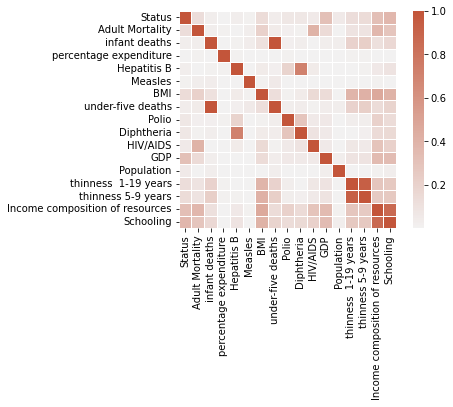

In [22]:
import seaborn as sb

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

sb.heatmap(X_train.corr()**2, cmap=cmap, center=0, square=True, linewidths=.5)

There is multicollinearity in the train data. Because of this, it cannot be used for interpretations because the β coefficients are unstable. It is a good prediction model because of its accuracy, however it cannot be used for hypothesis testing.

The following block analyzes whether the following regression model assumptions are supported:
  * normality of residuals
  * independence of residuals
  * no multicollinearity of predictors
  
First, we create a dataframe using the  residuals on validation data, fitted values, and actual values.

In [29]:
validation = pd.DataFrame({"actual": y_val.Life_Expectancy.values, "fitted": y_val_pred})
validation["residuals"] = validation.actual - validation.fitted
validation.describe()

,actual,fitted,residuals
count,43.000000,43.000000,43.000000
mean,71.351163,71.482646,-0.131484
std,7.599792,6.962953,3.578852
min,53.700000,52.443455,-11.080305
25%,67.250000,67.049630,-2.421678
50%,73.200000,72.492615,0.196440
75%,75.300000,76.125111,1.918461
max,85.000000,84.016592,7.622781


We can now plot our residuals.

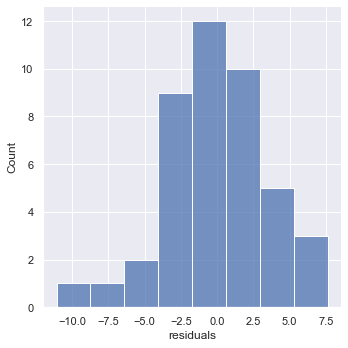

In [30]:
sb.set(rc={'figure.figsize':(4,3)})
sb.displot(validation, x="residuals")

Residuals are roughly normally distributed, one of the requirements of residuals is met.

The two plots below investigates the independence of residuals.

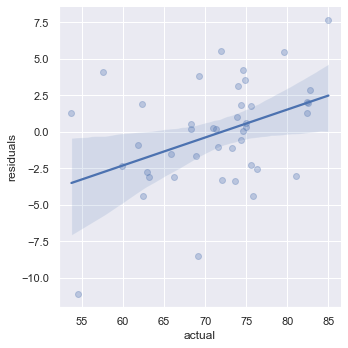

In [31]:
sb.set(rc={'figure.figsize':(4,3)})
sb.lmplot(data=validation, x="actual", y="residuals", scatter_kws={'alpha':0.3})

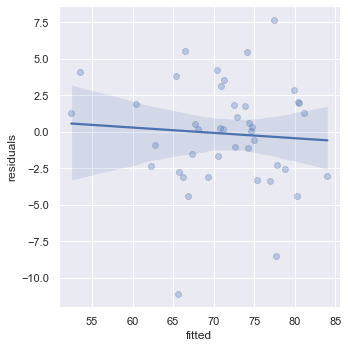

In [32]:
sb.set(rc={'figure.figsize':(4,3)})
sb.lmplot(data=validation, x="fitted", y="residuals", scatter_kws={'alpha':0.3})

In [33]:
validation.corr()

,actual,fitted,residuals
actual,1.000000,0.882811,0.405947
fitted,0.882811,1.000000,-0.070910
residuals,0.405947,-0.070910,1.000000


Residuals needs to be totally random. But here, the residuals are correlated with fitted values and actual values. This suggests that our model could be considerably increased.

The line below shows the correlation coefficients of our features.

In [215]:
X_tuning.corr()

,Status,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Status,1.000000,0.314525,0.177995,0.055521,-0.158960,0.087037,-0.373128,0.187352,-0.239169,-0.241310,0.209275,-0.537367,-0.206724,0.354544,0.357767,-0.561850,-0.576753
Adult Mortality,0.314525,1.000000,0.159896,-0.066903,-0.075864,0.002386,-0.442376,0.194681,-0.185026,-0.176434,0.546924,-0.326583,0.002299,0.294207,0.301455,-0.619829,-0.516817
infant deaths,0.177995,0.159896,1.000000,-0.024419,-0.061116,0.373773,-0.334562,0.995999,-0.142773,-0.107136,0.026696,-0.177416,0.139254,0.450759,0.462658,-0.307531,-0.376986
percentage expenditure,0.055521,-0.066903,-0.024419,1.000000,0.068192,-0.022007,0.060146,-0.025499,0.013247,0.060819,-0.060585,-0.031014,-0.021812,-0.029567,-0.027996,0.040045,0.038232
Hepatitis B,-0.158960,-0.075864,-0.061116,0.068192,1.000000,0.090699,0.204779,-0.075801,0.468508,0.876507,-0.384497,0.070845,0.036784,-0.025139,-0.086823,0.242480,0.297197
Measles,0.087037,0.002386,0.373773,-0.022007,0.090699,1.000000,-0.085363,0.359980,0.061597,0.077215,-0.062581,-0.079079,-0.058236,-0.053689,-0.068148,-0.010918,-0.010710
BMI,-0.373128,-0.442376,-0.334562,0.060146,0.204779,-0.085363,1.000000,-0.361375,0.169426,0.205236,-0.348579,0.386133,0.033117,-0.638545,-0.648179,0.716039,0.670046
under-five deaths,0.187352,0.194681,0.995999,-0.025499,-0.075801,0.359980,-0.361375,1.000000,-0.169655,-0.126064,0.055594,-0.190007,0.138502,0.456982,0.467668,-0.349727,-0.410765
Polio,-0.239169,-0.185026,-0.142773,0.013247,0.468508,0.061597,0.169426,-0.169655,1.000000,0.548024,-0.254708,0.214944,-0.015095,-0.252131,-0.252603,0.427139,0.368228
Diphtheria,-0.241310,-0.176434,-0.107136,0.060819,0.876507,0.077215,0.205236,-0.126064,0.548024,1.000000,-0.464463,0.195024,0.046048,-0.067024,-0.132146,0.367271,0.383071


Our features are correlated. Our pipeline cannot be used for hypothesis testing (unstable betas).

In conclusion, we have created a pipeline that fits quite well unseen data ( R2=0.778 on unseen data). However, our model is not easy to interpret.

## 5. Discussion: pros/cons and time complexity of the designed pipeline


Initially OLS regression is proposed for the prediction of Life_Expectancy. As a result, accuracy  on train data obtained is 92% and that of test data is 49%. Then the Lasso regression is introduced to reduce the high dimensionality and improve the performance by tuning with K-fold validation. As a result, accuracy obtained on tuning data is 89% whereas the accuracy on validation data is 77% . The lasso regression with tuning solves the overfit issue occured in OLS regression. In conclusion, the created a pipeline fits quite well unseen data ( R2=0.77 on unseen data).

**Time complexity of the proposed method**

The time complexity for training a Lasso regression model is  O(n^2⋅m), where:

n  is the number of observations (rows of data);
m  is the number of features (columns of data).
Once the Lasso regression model is trained, the time complexity to generate predictions and test results is significantly less than the training phase.

***The most time-consuming part is tuning***. The total time-complexity of tuning is therefore  O(a⋅k⋅n2⋅m), where:

a  is the number if  α  parameters to test;

k  is the number of folds in the k-fold cross validations.

Therefore, the highest weight comes from the number of observations.It will be better to choose a low value for  a  and  k for a quick execution time.

The created pipeline fits quite well unseen data ( R2=0.777 on unseen data). However, the proposed pipeline model is not easy to interpret. Also, the residual analysis shows that the residuals have some patterns (they are not random), indicating that the non-linear model may eventually improve our current linear pipeline.